# Простая линейная регрессия (Simple linear regression)

---

**Источники:**

[Руководство для начинающих](https://mlbootcamp.ru/ru/article/tutorial/)

[Введение в машинное обучение Сапунов Григорий CTO / Intento (inten.to)](https://www.hse.ru/data/2017/05/14/1171296413/%D0%93%D1%80%D0%B8%D0%B3%D0%BE%D1%80%D0%B8%D0%B9%20%D0%A1%D0%B0%D0%BF%D1%83%D0%BD%D0%BE%D0%B2%20%E2%80%94%20%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5%20%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5.pdf)

[Multiple Linear Regression Explained!](https://medium.com/datadriveninvestor/multiple-linear-regression-explained-8aa6cee9e796)

[Лекция 6. Корреляционный и регрессионный анализ](https://ppt-online.org/96724)

[Linear Regression and its Mathematical implementation](https://hackernoon.com/linear-regression-and-its-mathematical-implementation-sc1ql24o8)

[Простые регрессионные модели в Python](https://nagornyy.me/courses/data-science/regression/)

[Регрессионный анализ Кольцов С.Н](https://linis.hse.ru/data/2015/05/28/1096846759/%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D1%8F%208.pdf)

[Линейная регрессия Анна Лауринавичюте](https://www.hse.ru/data/2014/12/26/1103966229/mixed_effects_modeling.pdf)

[Все модели машинного обучения за 6 минут](https://nuancesprog.ru/p/6621/)

---

## Подготовка окружения

In [ ]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

## Загрузка данных

[Источник (FuelConsumption)](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

In [7]:
df = pd.read_csv("./../../data/FuelConsumptionCo2.csv")
df

MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0             AS5        Z                   9.9                  6.7   
1              M6        Z                  11.2                  7.7   
2             AV7        Z                   6.0                  5.8   
3             AS6        Z                  12.7                  9.1   
4             AS6        Z                  12.1                  8.7   
...           ...      ...                   ...                  ...   
1062          AS6        X                  13.4                  9.8   
1063          AS6        X                  13.2                  9.5   
1064          AS6        X                  13.4                  9.8   
1065          AS6        X                  12.9                  9.3   
1066          AS6        X                  14.9                 10.2   

      FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                      8.5                        33           196  
1                      9.6                        29           221  
2                      5.9                        48           136  
3                     11.1                        25           255  
4                     10.6                        27           244  
...                    ...                       ...           ...  
1062                  11.8                        24           271  
1063                  11.5                        25           264  
1064                  11.8                        24           271  
1065                  11.3                        25           260  
1066                  12.8                        22           294  

[1067 rows x 13 columns]

## Простая линейная регрессия (Simple linear regression)


**Простой называют линейную регрессию, в модели которой число независимых переменных равно 1.**


$y=b_{0} + b_{1}x$

$y$ - зависимая переменная, что мы измеряем в эксперименте (dependent variable)

$x$ - независимая переменная (independent variable)

$b_{0}$ - показывает, чему равна зависимая переменная, если предиктор равен нулю (intercept)

$b_{1}$ - показывает, насколько изменяется зависимая переменная при изменении независимой переменной (coef | slope)


Параметр модели $b_{1}$ вычисляется при помощи метода наименьших квадратов (Ordinary Least Squares).

<center><img src="images/linear_regression_marks.png" width=400 height=400/></center>

<img src="images/linear_regression.gif" width=900 height=900/>

## Обучение модели (Train)

In [8]:
# разделить независимую и зависимую переменные / train и test
from sklearn.model_selection import train_test_split

y = df[['CO2EMISSIONS']].copy()
X = df[['ENGINESIZE']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
# импортировать из пакета с моделями модель линейной регрессии
from sklearn import linear_model

# создать объект линейной регрессии
simple_regr = linear_model.LinearRegression()

# обучить модель
simple_regr.fit(X_train, y_train)

# вывести результаты обучения
print('Coefficients: ', simple_regr.coef_)
print('Intercept: ',simple_regr.intercept_)

Coefficients:  [[39.16827831]]
Intercept:  [126.00360915]


## Визуализация результата обучения модели

Text(0, 0.5, 'Emission')

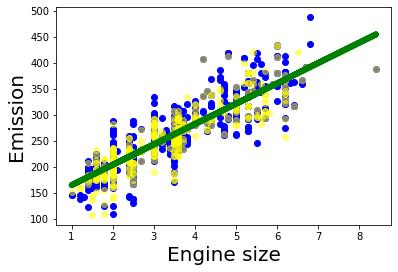

In [10]:
plt.scatter(X_train, y_train,  color='blue')
plt.scatter(X_test, y_test,  color='yellow', alpha=0.5)
plt.plot(X_train, 
        simple_regr.coef_[0]*X_train + simple_regr.intercept_, 
        '-g', 
        linewidth=6)
plt.xlabel("Engine size", fontsize=20)
plt.ylabel("Emission", fontsize=20)

## Оценка качества модели (Evaluation)

In [11]:
# использовать обученную модель для предсказания на test выборке
y_predicted = simple_regr.predict(X_test)

# вывести результаты предсказания
print(f'Variance score: {simple_regr.score(X_test, y_test)}')    # Coefficient of determination R^2 of the prediction
print(f"Residual sum of squares: {np.mean((y_predicted - y_test) ** 2)}")    # MSE

Variance score: 0.7648412489948487
Residual sum of squares: CO2EMISSIONS    957.630315
dtype: float64


In [12]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=y_predicted)    # эквивалентно simple_regr.score(X_test, y_test)

0.7648412489948487

In [13]:
from sklearn.metrics import mean_squared_error

# MSE
mean_squared_error(y_true=y_test, y_pred=y_predicted, squared=True)   # эквивалентно np.mean((y_predicted - y_test) ** 2)

957.6303149019186